In [52]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import **libraries**

In [ ]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


train and validation data

In [ ]:
data1_train = "/content/drive/MyDrive/DRC02/Processed_dataset/train"
data2_val= "/content/drive/MyDrive/DRC02/Processed_dataset/val"


function to count images

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

count images in each dataset

In [ ]:
train_samples =get_files(data1_train)
num_classes=len(glob.glob(data1_train+"/*"))
val_samples=get_files(data2_val)

print(num_classes,"Classes")
print(train_samples,"Train images")
print(val_samples,"val images")


6 Classes
1332 Train images
145 val images


image preprocessing 

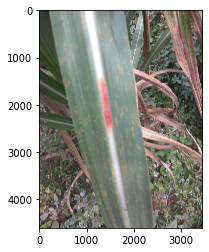

In [54]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/DRC02/Processed_dataset/train/redrot/redb10.jpg')
plt.imshow(img1);

img2 = image.load_img('/content/drive/MyDrive/DRC02/Processed_dataset/train/redrot/redb10.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)
#plt.imshow(img2);

In [61]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/DRC02/Processed_dataset/train/redrot/redb10.jpg')  # this is a PIL image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=10,
        )


x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='/content/drive/MyDrive/augm_data', save_prefix='redb10c', save_format='jpg'):
    i += 1
    if i > 5:
        break  # otherwise the generator would loop indefinitely

augmentation